## Data Exploration

ET and EEG feature comparison between Normal Reading (NR) and Task Specific Reading (TSR) / Annotation Reading (AR) for [ZuCo](https://osf.io/q3zws/)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as io
import gzip
import math
import matplotlib
import os
import re
import scipy

from scipy.stats import pearsonr, ttest_rel
from plot_funcs import *
from utils import *

In [ ]:
#NOTE: don't execute this cell
#TODO: still need to understand why those lines in Maria's code are necessary

#zurich['BNCfreq'] = zurich.WORDstrip.map(lambda x: unigrdict.get(str(x).lower()))
#zurich.BNCfreq = zurich.BNCfreq.fillna(zurich.BNCfreq.min())
#zurich.BNCfreq = zurich.BNCfreq/100 #because 100 million word - to get freq per million
#zurich.BNCfreq = np.log(zurich.BNCfreq)

#zurich['BNCfreqinv']= -zurich.BNCfreq

In [11]:
# instantiate data transformer object for task 1, 2, or 3 on sentence level (no scaling for now)
datatransform_t1 = DataTransformer('task1', level='sentence', scaling='raw', fillna='zeros')
datatransform_t2 = DataTransformer('task2', level='sentence', scaling='raw', fillna='zeros')
datatransform_t3 = DataTransformer('task3', level='sentence', scaling='raw', fillna='zeros')

In [ ]:
# get data for all subjects according to settings specified in cell above
# NOTE: data for each sbj will be stored in pd.DataFrame
sbjs_t1 = [datatransform_t1(i) for i in range(12)]
sbjs_t2 = [datatransform_t2(i) for i in range(12)]
sbjs_t3 = [datatransform_t3(i) for i in range(12)]

C:\Users\Lukas\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [9]:
# for each dataset check whether data is complete and transformation was performed correctly
for i, (sbj_t1, sbj_t2, sbj_t3) in enumerate(zip(sbjs_t1, sbjs_t2, sbjs_t3)):
    print("Subject:", i+1)
    print()
    print("Number of sents for task 1: ", len(sbj_t1))
    print("Number of sents for task 2: ", len(sbj_t2))
    print("Number of sents for task 3: ", len(sbj_t3))
    print()

Subject: 1

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 2

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 3

Number of sents for task 1:  299
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 4

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  360

Subject: 5

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 6

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  407

Subject: 7

Number of sents for task 1:  400
Number of sents for task 2:  250
Number of sents for task 3:  407

Subject: 8

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3:  359

Subject: 9

Number of sents for task 1:  400
Number of sents for task 2:  300
Number of sents for task 3

### Eye-Tracking feature comparison between first and second half of Task 1 (NR)

First and second half of Task 1 (NR Sentiment) have to be compared to inspect whether an order effect has to be reported

In [10]:
# split data into first and second half
first_half, second_half = split_data(sbjs_t1)

In [ ]:
# check whether data splitting was performed correctly
for i, (first, second) in enumerate(zip(first_half, second_half)):
    print("Subject:", i)
    print()
    print("Number of sents in first half:", len(first))
    print()
    print("Number of sents in second half:", len(second))
    print()

In [11]:
sentlen_m1, omissions_m1, fixations_m1, pupilsize_m1, gd_m1, trt_m1, ffd_m1, gpt_m1, bncfreq_m1 = compute_means(first_half)
sentlen_m2, omissions_m2, fixations_m2, pupilsize_m2, gd_m2, trt_m2, ffd_m2, gpt_m2, bncfreq_m2 = compute_means(second_half)

In [12]:
sentlens1, omissions1, fixations1, pupilsize1, gd1, trt1, ffd1, gpt1, bnc_freqs1 = compute_allvals(first_half)
sentlens2, omissions2, fixations2, pupilsize2, gd2, trt2, ffd2, gpt2, bnc_freqs2 = compute_allvals(second_half)

In [13]:
corr_mat(compute_allvals(first_half))

,SentLen,omissionRate,nFixations,meanPupilSize,GD,TRT,FFD,GPT,BNCFreq
SentLen,1.000000,0.103383,-0.211824,-0.091984,-0.201218,-0.266746,-0.173788,-0.243757,0.232821
omissionRate,0.103383,1.000000,-0.609762,-0.470343,-0.646482,-0.587461,-0.784004,-0.554806,0.237872
nFixations,-0.211824,-0.609762,1.000000,0.216533,0.591648,0.955968,0.516270,0.901170,-0.303149
meanPupilSize,-0.091984,-0.470343,0.216533,1.000000,0.303765,0.203303,0.367611,0.173929,-0.120124
GD,-0.201218,-0.646482,0.591648,0.303765,1.000000,0.693946,0.823562,0.593715,-0.396743
TRT,-0.266746,-0.587461,0.955968,0.203303,0.693946,1.000000,0.631301,0.921068,-0.321904
FFD,-0.173788,-0.784004,0.516270,0.367611,0.823562,0.631301,1.000000,0.563513,-0.258297
GPT,-0.243757,-0.554806,0.901170,0.173929,0.593715,0.921068,0.563513,1.000000,-0.260847
BNCFreq,0.232821,0.237872,-0.303149,-0.120124,-0.396743,-0.321904,-0.258297,-0.260847,1.000000


#### Mean fixations per word per subject

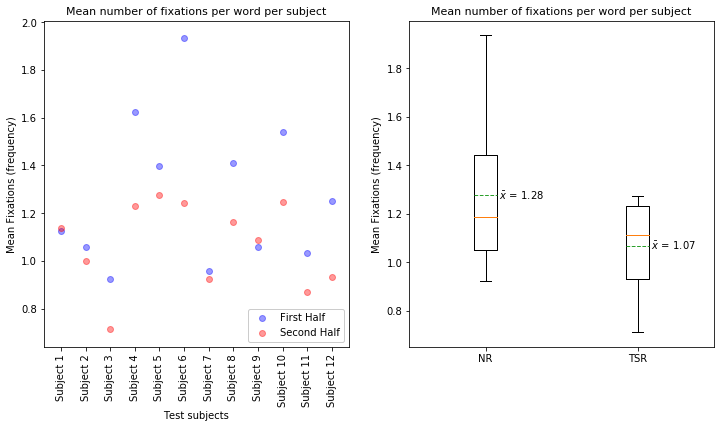

In [16]:
plot_fix(fixations_m1, fixations_m2)

#### Omission rate on sentence level

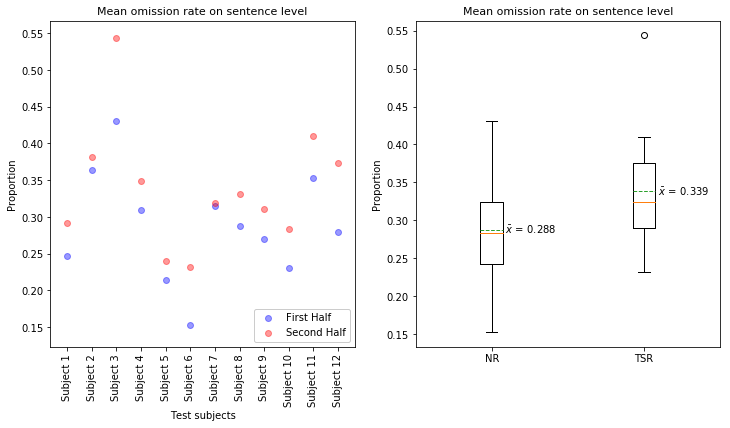

In [17]:
plot_omissions(omissions_m1, omissions_m2)

#### Mean GD per word per subject

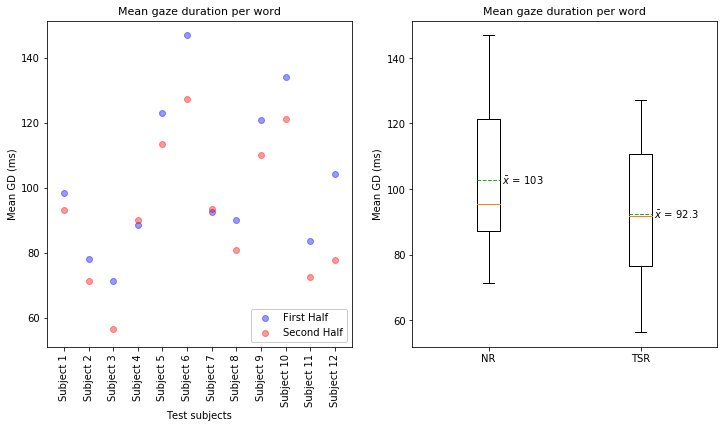

In [18]:
plot_gd(gd_m1, gd_m2)

#### Mean TRT per word per subject

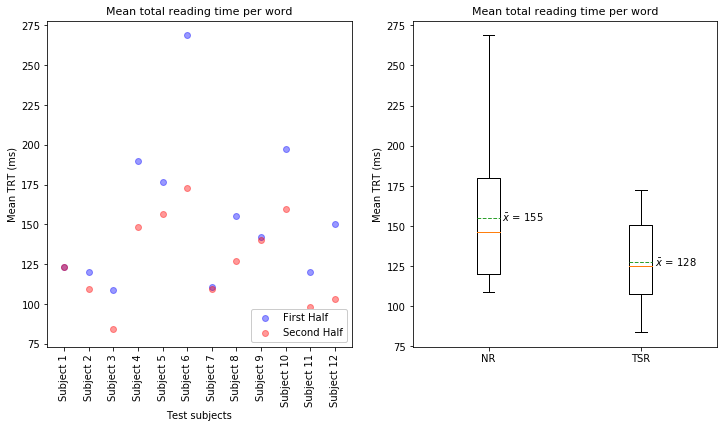

In [19]:
plot_trt(trt_m1, trt_m2)

#### Mean FFD per word per subject

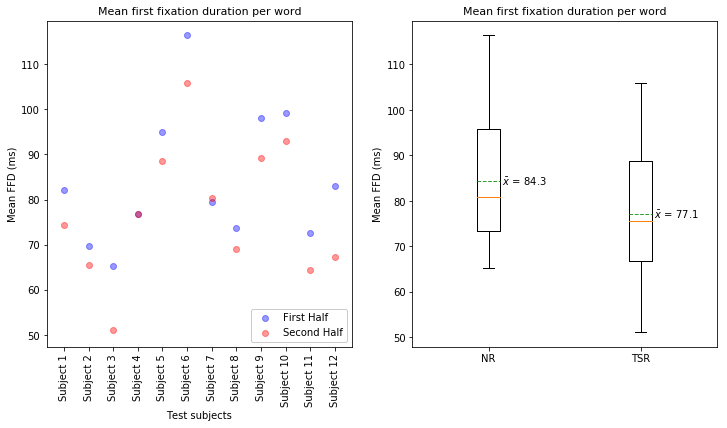

In [20]:
plot_ffd(ffd_m1, ffd_m2)

### Eye-Tracking feature comparison between Task 2 (NR) and Task 3 (TSR)

In [34]:
corr_mat(compute_allvals(sbjs_t2))

,SentLen,omissionRate,nFixations,meanPupilSize,GD,TRT,FFD,GPT,BNCFreq
SentLen,1.000000,0.040784,-0.087047,-0.066742,-0.063532,-0.117505,-0.058868,-0.113098,0.085329
omissionRate,0.040784,1.000000,-0.702497,-0.539264,-0.759312,-0.675742,-0.858278,-0.632515,0.098750
nFixations,-0.087047,-0.702497,1.000000,0.411115,0.689115,0.960544,0.647357,0.899860,-0.159589
meanPupilSize,-0.066742,-0.539264,0.411115,1.000000,0.447868,0.417883,0.500577,0.368706,-0.040262
GD,-0.063532,-0.759312,0.689115,0.447868,1.000000,0.780013,0.887732,0.690889,-0.120335
TRT,-0.117505,-0.675742,0.960544,0.417883,0.780013,1.000000,0.733812,0.927549,-0.158781
FFD,-0.058868,-0.858278,0.647357,0.500577,0.887732,0.733812,1.000000,0.674299,-0.093688
GPT,-0.113098,-0.632515,0.899860,0.368706,0.690889,0.927549,0.674299,1.000000,-0.158351
BNCFreq,0.085329,0.098750,-0.159589,-0.040262,-0.120335,-0.158781,-0.093688,-0.158351,1.000000


In [35]:
corr_mat(compute_allvals(sbjs_t3))

,SentLen,omissionRate,nFixations,meanPupilSize,GD,TRT,FFD,GPT,BNCFreq
SentLen,1.000000,0.213212,-0.170904,-0.177574,-0.175855,-0.177596,-0.207089,-0.168958,-0.137217
omissionRate,0.213212,1.000000,-0.816110,-0.729670,-0.867341,-0.772787,-0.917082,-0.727620,-0.159095
nFixations,-0.170904,-0.816110,1.000000,0.589205,0.772065,0.955975,0.751788,0.900077,0.092237
meanPupilSize,-0.177574,-0.729670,0.589205,1.000000,0.582968,0.528432,0.626683,0.497310,0.125967
GD,-0.175855,-0.867341,0.772065,0.582968,1.000000,0.834598,0.949820,0.754353,0.082647
TRT,-0.177596,-0.772787,0.955975,0.528432,0.834598,1.000000,0.805652,0.927450,0.077122
FFD,-0.207089,-0.917082,0.751788,0.626683,0.949820,0.805652,1.000000,0.745918,0.124178
GPT,-0.168958,-0.727620,0.900077,0.497310,0.754353,0.927450,0.745918,1.000000,0.092031
BNCFreq,-0.137217,-0.159095,0.092237,0.125967,0.082647,0.077122,0.124178,0.092031,1.000000


In [21]:
sentlen_m_t2, omissions_m_t2, fixations_m_t2, pupilsize_m_t2, gd_m_t2, trt_m_t2, ffd_m_t2, gpt_m_t2, bncfreq_m_t2 = compute_means(sbjs_t2)
sentlen_m_t3, omissions_m_t3, fixations_m_t3, pupilsize_m_t3, gd_m_t3, trt_m_t3, ffd_m_t3, gpt_m_t3, bncfreq_m_t3 = compute_means(sbjs_t3)

In [22]:
sentlens_t2, omissions_t2, fixations_t2, pupilsize_t2, gd_t2, trt_t2, ffd_t2, gpt_t2, bnc_freqs_t2 = compute_allvals(sbjs_t2)
sentlens_t3, omissions_t3, fixations_t3, pupilsize_t3, gd_t3, trt_t3, ffd_t3, gpt_t3, bnc_freqs_t3 = compute_allvals(sbjs_t3)

In [25]:
print("p-value:", ttest_rel(sentlen_m_t2, sentlen_m_t3)[1])

p-value: 2.0122975448120992e-11


#### Mean fixations per word per subject

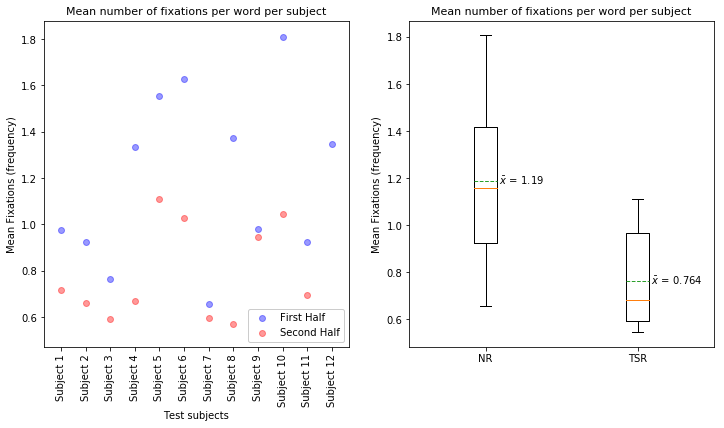

p-value: 0.00036318622727519757


In [26]:
plot_fix(fixations_m_t2, fixations_m_t3)
print("p-value:", ttest_rel(fixations_m_t2, fixations_m_t3)[1])

#### Omission rate on sentence level

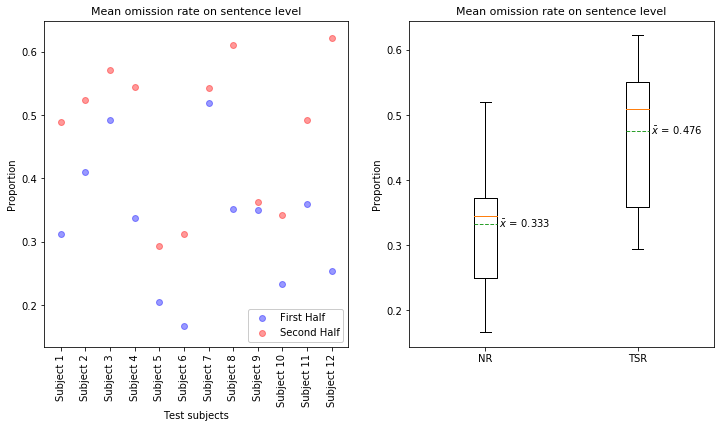

p-value: 0.00043113215447733845


In [27]:
plot_omissions(omissions_m_t2, omissions_m_t3)
print("p-value:", ttest_rel(omissions_m_t2, omissions_m_t3)[1])

#### Mean GD per word per subject

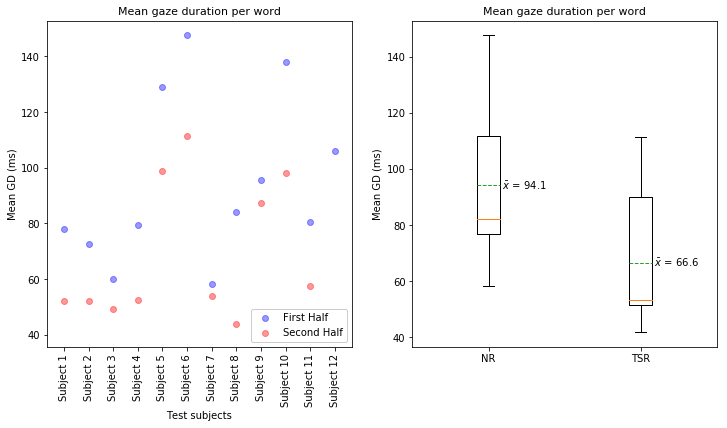

p-value: 0.0001277092170430438


In [31]:
plot_gd(gd_m_t2, gd_m_t3)
print("p-value:", ttest_rel(gd_m_t2, gd_m_t3)[1])

#### Mean TRT per word per subject

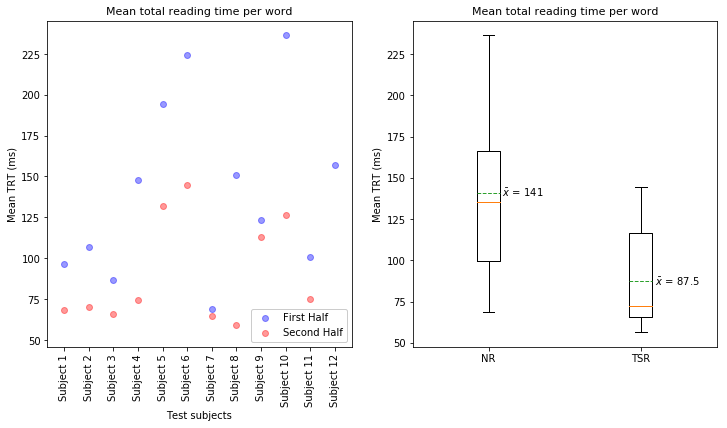

p-value: 0.0003932655606646964


In [36]:
plot_trt(trt_m_t2, trt_m_t3)
print("p-value:", ttest_rel(trt_m_t2, trt_m_t3)[1])

#### Mean FFD per word per subject

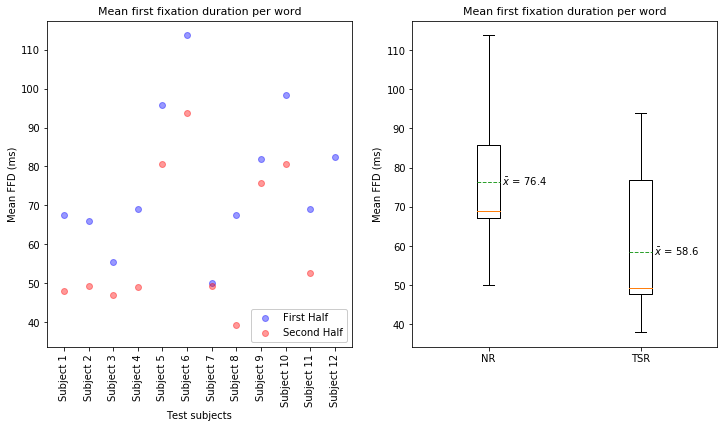

In [33]:
plot_ffd(ffd_m_t2, ffd_m_t3)